# Trabajo1 - Presentado por Esteban Garcia Solis

In [0]:
import math
import numpy as np

import torch
from torch.distributions import constraints
from torch.distributions.distribution import Distribution
from torch.distributions.utils import _standard_normal, lazy_property

import torch.distributions as distrib

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

1) Escriba la función generarPuntosPlano, la cual genere $m=20$ puntos en $\vec{x}_{i}\in\mathbb{R}^{3}$ aleatorios los cuales pertenezcan a un plano con función $f\left(x,y\right)=0.2x+y+\epsilon, f:\mathbb{R}^{2}\rightarrow\mathbb{R}$, con $\epsilon$ una variable aleatoria de $\mu=0$ y $\sigma=0.05$ Almacenelos en una matriz de modo que: $$X=\begin{bmatrix}| & | & |\\\vec{x}_{1} & \ldots & \vec{x}_{m}\\| & | & |\end{bmatrix}$$

In [38]:
def generarPuntosPlano(samples = 20):

  #create random X1 and X2 values
  x1_x2 = torch.rand(samples, 2)

  #create randodm error mu = 0 sigma = 0.5
  e = torch.reshape(torch.randn(samples) * 0.5, (samples, 1))

  #factors for plane equation x3= e + 0.2 x1 + x2
  factors = torch.tensor([[1.0], [0.2], [1.0]])

  #e, x1, x2 matrix
  e_x1_x2 = torch.cat((e, x1_x2), 1)

  #Calculate x3
  x3 = e_x1_x2.mm(factors)

  #Samples matrix (x1, x2, x3 removed e)
  X = torch.cat((e_x1_x2[:,1:3], x3), 1)

  return X

X = generarPuntosPlano(20)

print("X: ", X.shape, "\n", X)

X:  torch.Size([20, 3]) 
 tensor([[ 0.6137,  0.8226,  0.0353],
        [ 0.1115,  0.7059,  2.2793],
        [ 0.1922,  0.6658, -0.1567],
        [ 0.1891,  0.4833,  0.4861],
        [ 0.6488,  0.3442,  0.4979],
        [ 0.8430,  0.0711,  0.1853],
        [ 0.6236,  0.7845,  1.0194],
        [ 0.9197,  0.3018,  1.6056],
        [ 0.9129,  0.9487,  1.4946],
        [ 0.9166,  0.4976,  1.3280],
        [ 0.3856,  0.6629,  1.0005],
        [ 0.5952,  0.0568,  0.7806],
        [ 0.0988,  0.3391,  1.5955],
        [ 0.3230,  0.2770,  0.5905],
        [ 0.8937,  0.4641,  0.0544],
        [ 0.2807,  0.9674,  1.4056],
        [ 0.4671,  0.0450, -0.6051],
        [ 0.9444,  0.4939,  0.5049],
        [ 0.8999,  0.1871,  0.7383],
        [ 0.1777,  0.7421,  1.3413]])


1.a) Grafique los puntos con la función scatter3.

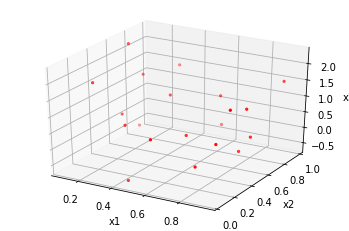

In [39]:
def plot3d(samples, show = True):
  
  #Plot
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  
  #labels
  ax.set_xlabel('x1')
  ax.set_ylabel('x2')
  ax.set_zlabel('x3')

  ax.scatter(X[:, 0].numpy(), X[:, 1].numpy(), X[:, 2].numpy(), c='r', marker='.')

  if show:
    plt.show()
    
  return ax

ax = plot3d(X, show = True)

2) Cree una función $calcularEigenvectoresYValores(X, k'=2)$ la cual calcule los auto-vectores y auto-valores de tal matriz de covarianza $\Sigma$.

2.a) ¿Cuáles deberían ser las dimensiones de la matriz de covarianza $\Sigma$?
  
  **$$Sigma\in\mathbb{R}^{3\times 3}$$**

2.b) Calcule la matriz de covarianza $\Sigma$ usando la función implementada en el trabajo práctico anterior.

2.c) La función debe tomar los dos auto-vectores de $\Sigma$ con mayores auto-valores $\vec{v}_{1}$ y $\vec{v}_{2}$ para crear un nuevo subespacio $E=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2}\right\}$ , y cree la matriz de la base con tales autovectores:$$V=\begin{bmatrix}| & |\\\vec{v}_{1} & \vec{v}_{2}\\| & |\end{bmatrix}.$$

In [40]:
def calcularEigenvectoresYValores(X, k = 2, best = True):
  
  #use numpy cov function to calculate the covariance matrix
  Sigma = torch.tensor(np.cov(X.transpose(0, 1).numpy()))
  
  #one eigen value per row, and its corresponding eigenvector per column
  EigenValues, EigenVectors = torch.eig(Sigma ,eigenvectors=True)
  
  #sort eigenValues 
  dummy,order = EigenValues[:,0].sort(descending = best)
  
  #get best k eigenVectors
  V = EigenVectors[:,order[:k]]
  
  print("Sigma: \n", Sigma.shape, "\n", Sigma)
  print("\nEigenValues:  \n", EigenValues[:,0])
  print("\nEigenVectors: \n", EigenVectors.shape, "\n", EigenVectors)
  print("\nV:            \n", V.shape, "\n", V)
  
  return V

V = calcularEigenvectoresYValores(X, k = 2, best = True)

Sigma: 
 torch.Size([3, 3]) 
 tensor([[ 0.0977, -0.0200, -0.0358],
        [-0.0200,  0.0834,  0.0785],
        [-0.0358,  0.0785,  0.5111]], dtype=torch.float64)

EigenValues:  
 tensor([0.5285, 0.1001, 0.0636], dtype=torch.float64)

EigenVectors: 
 torch.Size([3, 3]) 
 tensor([[-0.0897,  0.9124, -0.3994],
        [ 0.1768, -0.3800, -0.9079],
        [ 0.9801,  0.1520,  0.1273]], dtype=torch.float64)

V:            
 torch.Size([3, 2]) 
 tensor([[-0.0897,  0.9124],
        [ 0.1768, -0.3800],
        [ 0.9801,  0.1520]], dtype=torch.float64)


2.d) Grafique los puntos obtenidos en la matriz X usando la función scatter3, y grafique en la misma figura los 2 auto-vectores que forman el espacio generador, con origen en la media de los datos o centroide $\mu$. Comente los resultados.

**Los eigenvectors en el grafico muestran la direcion del nuevo espacio**

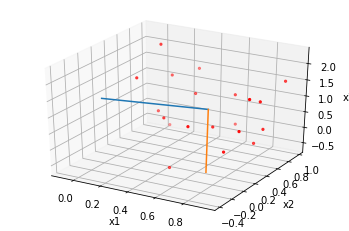

In [41]:
def plotVectors(V, mu, ax, show = True):
  
  k = list(V.size())[1]
  
  for i in range(k):  
    x1 = [mu[0].numpy(), V[0,i].numpy()]
    x2 = [mu[1].numpy(), V[1,i].numpy()]
    x3 = [mu[2].numpy(), V[2,i].numpy()]
    
    ax.plot(x1, x2, x3)

  if show:
    plt.show()
    
  return ax


mu = torch.mean(X, 0)
ax = plot3d(X, show = False)
ax = plotVectors(V, mu, ax, show = True)


3) Verifique si tales auto-vectores son orto-normales, si es así, ¿porqué sucede esto?

**Son orto-normales porque la matriz de covarianza $\Sigma$ es simetrica**

In [42]:
def orthoNormalCheck(V): 
  #verify that the norm of each eigenvector is one, since eigen vectors are orthonormals
  print("orthonormal check")
  
  k = list(V.size())[1]
  
  for i in range(k): 
    print(torch.norm(V[:, i], 2))
  
orthoNormalCheck(V)

orthonormal check
tensor(1., dtype=torch.float64)
tensor(1., dtype=torch.float64)


4) Reduzca la dimensionalidad de los datos de modo que se pase de un espacio en $\mathbb{R}^{3}$ a un espacio en $\mathbb{R}^{2}$ usando 2 los auto-vectores con mayores auto-valores, en la función reducirDimensionalidadDataset(dataset, baseVectors), sin usar estructuras de repetición tipo for. 

4.a) Calcule la muestra promedio $\vec{\mu}\in\mathbb{R}^{3}$ para los datos en X, y calcule una nueva matriz $U\in\mathbb{R}^{3\times m}$ en la que cada vector en el espacio tenga su origen en $\vec{\mu}$, haciendo que cada columna i esté dada por $\vec{u}_{i}=\vec{x}_{i}-\vec{\mu}$.

4.b) Para cada muestra $\vec{u}_{i}$ calcule la magnitud de la proyección en cada eje del nuevo espacio vectorial $E_{1}=\textrm{espacioGenerado}\left\{ \vec{v}_{1},\vec{v}_{2}\right\}$ , creando una muestra con dimensión reducida $$\vec{x}_{i}^{r}=\begin{bmatrix}x_{i,1}^{r}\\x_{i,2}^{r}\end{bmatrix} donde: \begin{array}{c}x_{i,1}^{r}=\vec{u}_{i}\cdot\vec{v}_{1}\\x_{i,2}^{r}=\vec{u}_{i}\cdot\vec{v}_{2}\end{array}$$

4.c) Agrupe los resultados en la matriz $X^{r}=\begin{bmatrix}| & | & |\\\vec{x}_{1}^{r} & \ldots & \vec{x}_{m}^{r}\\| & | & |
\end{bmatrix}$ y grafiquelos usando la función scatter2. Comente los resultados, ¿Realmente hubo una reducción de la dimensionalidad, y se preservaron los ejes de mayor varianza?

**Si hay una reducción de $\mathbb{R}^{3}$ a $\mathbb{R}^{2}$, los ejes se selecionaron de acuerdo a la magnitud de los eigen-values por lo que se debe preservar la proyeccion a los eigen-vectors que representan la mayor variación.**

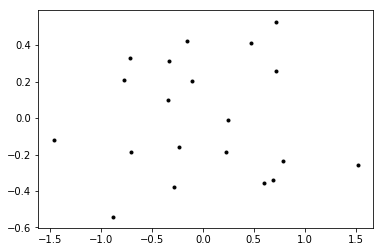

In [43]:
def reducirDimensionalidadDataset(X, V):
  
  mu = torch.mean(X, 0)
  U = X - mu

  X_gamma = torch.mm(U, V.float())

  return X_gamma

X_gamma = reducirDimensionalidadDataset(X, V)

if list(V.size())[1] == 2:
  plt.scatter(X_gamma[:, 0], X_gamma[:, 1], color = "black", marker = ".")
  plt.show()

5) Calcule el error al usar los dos autovectores con mayores autovalores: $$V\in\mathbb{R}^{3\times2}V=\begin{bmatrix}| & |\\
\vec{v}_{1} & \vec{v}_{2}\\| & |\end{bmatrix}.$$

Calculelo generando una matriz con los vectores proyectados $P\in\mathbb{R}^{3\times m}$, la pseudoinversa $V^{+}\in\mathbb{R}^{2\times3}$, y el conjunto de muestras con la media sustraída 

$U\in\mathbb{R}^{3\times m}P=V\,\left(V^{T}V\right)^{-1}V^{T}U=V\,V^{+}U$, midiendo el error con el RMSE de la matriz de datos proyectados $P$, respecto a los datos con la media extraida $U$. 


In [44]:
def calcularError(V, X):
  
  mu = torch.mean(X, 0)
  U = (X - mu).transpose(0,1).float()
  V = V.float()
  
  V_pInv = torch.tensor(np.linalg.pinv(V))
  
  P = V.mm(V_pInv).mm(U)
  
  #print("P: ", P)
  
  errorsPerSample = torch.norm(P - U, 2, 0)
  error = torch.norm(errorsPerSample, 2, 0)  
  
  print("error: ", error)
  
calcularError(V, X)


error:  tensor(1.0994)


5.a) Compare el error con usar sólo el mejor auto-vector $\vec{v}_{1}$. Comente si disminuye o aumenta el error.

**Al usar solamente el mejor autovector el error aumenta.**

In [45]:
calcularError(V[:,0:1], X)


error:  tensor(1.7636)
